In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
from mpl_toolkits.basemap import Basemap

### Weather station data in the Netherlands

In [2]:
df = pd.read_parquet('datasets/part-00000-tid-2789511524578721898-08cae995-4879-40e6-b739-92aa0f67bfaa-404-1-c000.snappy.parquet')

df.shape 

(19188675, 25)

In [3]:
df.sample(10)

,STN,YYYYMMDD,H,DD,FH,FF,FX,T,T10N,TD,...,VV,N,U,WW,IX,M,R,S,O,Y
16217791,235,19790514,11,220,72,67,98,174,,127,...,18,0,74,10,,0,0,0,0,0
2189217,275,20140922,10,330,70,60,140,134,,96,...,62,8,78,57,7,0,1,0,0,0
3378779,280,20020729,12,120,20,20,50,295,200,158,...,75,1,44,,2,0,0,0,0,0
473819,269,20070319,12,240,20,20,40,30,3,26,...,65,3,97,24,7,0,0,1,0,0
17613353,275,19650409,21,0,,0,,36,,18,...,50,0,88,10,,0,0,0,0,0
12818203,277,19921226,20,90,15,15,26,16,,15,...,,,99,,,,,,,
9941947,285,20000622,20,220,110,120,150,,,,...,,,,,6,,,,,
6479920,319,20180331,17,250,50,40,80,90,,50,...,75,,75,,5,0,0,0,0,0
17678601,344,19651007,13,990,,15,,212,,184,...,25,0,84,10,,0,0,0,0,0
7361891,310,20200521,12,110,30,40,40,199,168,134,...,58,3,66,4,7,0,0,0,0,0


Identifying unique values helps understand the range and type of data in each column. This insight is crucial for determining the kind of preprocessing needed. 

In [4]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column '{column}': {unique_values}")

Column 'STN': ['  209' '  210' '  225' '  235' '  240' '  242' '  248' '  249' '  251'
 '  257' '  258' '  260' '  265' '  267' '  269' '  270' '  273' '  275'
 '  277' '  278' '  279' '  280' '  283' '  285' '  286' '  290' '  308'
 '  310' '  311' '  312' '  313' '  315' '  316' '  319' '  324' '  330'
 '  331' '  340' '  343' '  344' '  348' '  350' '  356' '  370' '  375'
 '  377' '  380' '  391' '  323' '  215']
Column 'YYYYMMDD': ['20060201' '20060202' '20060203' ... '19510129' '19510130' '19510131']
Column 'H': ['    1' '    2' '    3' '    4' '    5' '    6' '    7' '    8' '    9'
 '   10' '   11' '   12' '   13' '   14' '   15' '   16' '   17' '   18'
 '   19' '   20' '   21' '   22' '   23' '   24']
Column 'DD': ['  100' '  120' '   90' '  110' '  220' '  350' '  150' '  190' '  240'
 '  200' '  260' '  250' '  300' '  330' '   80' '   70' '  140' '  130'
 '  990' '  160' '  270' '  290' '  180' '    0' '  230' '  310' '  320'
 '  170' '  340' '  360' '   50' '   40' '  210'

Column 'T10N': ['     ' '  -30' '  -36' '  -28' '  -21' '  -31' '  -34' '  -22' '  -24'
 '  -32' '  -23' '  -19' '  -27' '  -33' '  -14' '  -25' '  -39' '  -13'
 '  -17' '  -38' '  -37' '  -42' '  -29' '  -41' '  -35' '  -16' '  -20'
 '  -46' '  -51' '  -45' '  -11' '  -43' '  -44' '  -50' '   -6' '  -40'
 '  -47' '  -81' '  -59' '  -26' '  -18' '  -77' '  -57' '  -70' '    1'
 '    2' '    8' '   -3' '    7' '   15' '   14' '   -4' '    3' '   -1'
 '   11' '   21' '   -5' '   -7' '   18' '   16' '   10' '  -12' '    4'
 '  -15' '   -8' '    9' '  -10' '  -53' '  -49' '   -2' '  -54' '   -9'
 '   38' '   39' '   26' '   45' '   44' '   41' '   42' '   32' '   43'
 '   40' '   35' '   27' '   47' '   12' '   25' '   29' '   23' '   30'
 '   13' '   28' '   20' '   19' '   24' '    6' '   17' '    5' '    0'
 '   36' '   34' '   33' '   22' '   37' '   51' '   52' '   53' '   31'
 '   48' '   59' '   58' '   49' '   57' '   54' '   46' '   50' '   62'
 '   61' '   56' '   67' '   65' '  

Column 'SQ': ['     ' '    0' '    3' '    2' '    8' '    1' '    9' '    7' '    5'
 '    4' '   10' '    6' '   -1']
Column 'Q': ['     ' '    0' '    1' '   12' '   29' '   35' '   36' '   31' '   24'
 '    9' '   10' '   38' '   44' '   42' '   25' '   33' '   52' '   48'
 '   61' '   56' '   40' '   46' '   37' '   34' '   27' '   20' '   41'
 '   72' '   39' '    8' '   15' '   30' '   50' '   11' '   66' '   88'
 '   43' '   53' '   81' '   13' '   22' '   32' '   49' '   23' '   28'
 '   71' '   93' '   87' '   47' '    7' '   19' '   26' '   21' '   14'
 '   18' '    6' '   17' '   16' '   60' '    5' '    3' '  135' '  146'
 '  105' '   67' '    4' '    2' '   51' '   45' '   63' '   79' '   69'
 '   74' '   54' '   76' '   64' '   73' '   62' '   70' '   59' '   91'
 '   57' '   97' '   75' '   65' '   55' '   58' '   77' '  100' '   92'
 '   78' '   96' '   82' '   80' '  112' '  134' '   85' '   86' '  108'
 '  103' '  110' '   95' '   83' '  120' '  111' '  109' '   89' 

Column 'VV': ['     ' '    2' '    3' '    8' '    4' '    5' '    9' '   10' '   14'
 '    6' '    7' '   12' '   22' '   31' '   37' '   40' '    1' '   13'
 '   21' '   18' '   15' '   17' '   26' '   42' '   50' '   19' '   25'
 '   11' '   24' '   44' '   39' '   28' '   41' '   58' '   65' '   16'
 '   29' '   23' '   38' '   36' '   20' '   33' '   45' '   46' '   30'
 '    0' '   43' '   35' '   48' '   56' '   57' '   59' '   60' '   61'
 '   62' '   47' '   32' '   66' '   67' '   69' '   68' '   64' '   70'
 '   63' '   27' '   49' '   34' '   71' '   75' '   74' '   72' '   73'
 '   80' '   78' '   82' '   79' '   77' '   76' '   81' '   83' '   84'
 '   51' '   52' '   53' '   54' '   86' '   98' '   85' '   55' '   89'
 '   87' '   96' '   95' '   97' '   99' '   94' '   92' '   93' '   88'
 '   91' '   90']
Column 'N': ['     ' '    9' '    8' '    7' '    0' '    3' '    1' '    6' '    2'
 '    5' '    4' '   35' '   11' '   10' '   88' '   87']
Column 'U': ['     ' ' 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19188675 entries, 0 to 19188674
Data columns (total 25 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   STN       object
 1   YYYYMMDD  object
 2   H         object
 3   DD        object
 4   FH        object
 5   FF        object
 6   FX        object
 7   T         object
 8   T10N      object
 9   TD        object
 10  SQ        object
 11  Q         object
 12  DR        object
 13  RH        object
 14  P         object
 15  VV        object
 16  N         object
 17  U         object
 18  WW        object
 19  IX        object
 20  M         object
 21  R         object
 22  S         object
 23  O         object
 24  Y         object
dtypes: object(25)
memory usage: 3.6+ GB


By checking the data types in each column, we understand that each one is an object. Now, when we also can see each column name, we would suggest a name for each to each our work further. More research about the meanings would be done before the end of this iteration.

In [6]:
column_name_mapping = {
    'STN': 'Station ID',
    'YYYYMMDD': 'Date (YYYY-MM-DD)',
    'H': 'Hour',
    'DD': 'Wind Direction (degrees)',
    'FH': 'Hourly Average Wind Speed (m/s)',
    'FF': 'Wind Speed (m/s)',
    'FX': 'Highest Wind Gust (m/s) ',
    'T': 'Temperature (0.1°C)',
    'T10N': 'Minimum Temperature at 10cm (0.1°C)',
    'TD': 'Dew Point Temperature (0.1°C)',
    'SQ': 'Sunshine Duration (hours)',
    'Q': 'Global Radiation (J/cm²)',
    'DR': 'Duration of Precipitation (hours)',
    'RH': 'Precipitation Amount (mm)',
    'P': 'Atmospheric Pressure (hPa)',
    'VV': 'Visibility (m)',
    'N': 'Cloud Cover (oktas)',
    'U': 'Relative Humidity (%)',
    'WW': 'Weather Code',
    'IX': 'Weather Station Type',
    'M': 'Fog Indicator',
    'R': 'Rainfall Indicator',
    'S': 'Snow Indicator',
    'O': 'Thunderstorm Indicator',
    'Y': 'Ice Formation Indicator'
}

df.rename(columns=column_name_mapping, inplace=True)
df.sample(10)

,Station ID,Date (YYYY-MM-DD),Hour,Wind Direction (degrees),Hourly Average Wind Speed (m/s),Wind Speed (m/s),Highest Wind Gust (m/s),Temperature (0.1°C),Minimum Temperature at 10cm (0.1°C),Dew Point Temperature (0.1°C),...,Visibility (m),Cloud Cover (oktas),Relative Humidity (%),Weather Code,Weather Station Type,Fog Indicator,Rainfall Indicator,Snow Indicator,Thunderstorm Indicator,Ice Formation Indicator
7166473,273,20191130,2,260,20,20,30,12,,6,...,65,,95,,5,0,0,0,0,0
17150253,235,19611001,1,270,62,62,,152,,108,...,62,8,75,2,,0,0,0,0,0
16052363,240,19780426,15,80,82,77,113,162,,52,...,57,6,48,5,,0,0,0,0,0
13715336,380,19870329,12,330,67,82,118,54,19,6,...,75,4,71,1,,0,0,0,0,0
6873022,249,20190315,23,280,90,90,140,78,,29,...,71,,71,,5,0,0,0,0,0
2088707,242,20140114,12,140,50,60,80,54,45,44,...,61,5,93,,5,0,0,0,0,0
12089437,310,19930721,14,290,51,57,82,161,,123,...,60,7,78,2,,0,0,0,0,0
9017310,249,20221124,7,220,60,50,110,79,,60,...,70,,87,81,7,0,1,0,0,0
3965266,277,20031231,11,20,10,20,20,28,,24,...,,,97,,6,,,,,
15743988,270,19760512,16,200,72,67,108,95,,89,...,57,8,96,61,,0,1,0,0,0


After the research some of our group members conducted, we decided to drop the following columns as their information is irrelevant to our goal - "Duration of traffic jam".

In [7]:
columns_to_drop = ['Wind Direction (degrees)', 'Minimum Temperature at 10cm (0.1°C)', 'Sunshine Duration (hours)',
                   'Global Radiation (J/cm²)', 'Atmospheric Pressure (hPa)', 'Cloud Cover (oktas)',
                   'Relative Humidity (%)', 'Dew Point Temperature (0.1°C)', 'Weather Station Type', 'Weather Code']

df.drop(columns=columns_to_drop, inplace=True)
df

,Station ID,Date (YYYY-MM-DD),Hour,Hourly Average Wind Speed (m/s),Wind Speed (m/s),Highest Wind Gust (m/s),Temperature (0.1°C),Duration of Precipitation (hours),Precipitation Amount (mm),Visibility (m),Fog Indicator,Rainfall Indicator,Snow Indicator,Thunderstorm Indicator,Ice Formation Indicator
0,209,20060201,1,40,40,50,,,,,,,,,
1,209,20060201,2,40,40,60,,,,,,,,,
2,209,20060201,3,30,30,50,,,,,,,,,
3,209,20060201,4,20,10,40,,,,,,,,,
4,209,20060201,5,20,20,40,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19188670,380,19510131,20,0,0,,20,,,,1,0,0,0,0
19188671,380,19510131,21,0,0,,20,,,,1,0,0,0,0
19188672,380,19510131,22,0,0,,19,,,,1,0,0,0,0
19188673,380,19510131,23,0,0,,18,,,,1,0,0,0,0


Now, after seeing that the columns are in the wrong data type and after removing some columns, let's also check the explicitly missing values.

In [8]:
df.isna().sum()

Station ID                           0
Date (YYYY-MM-DD)                    0
Hour                                 0
Hourly Average Wind Speed (m/s)      0
Wind Speed (m/s)                     0
Highest Wind Gust (m/s)              0
Temperature (0.1°C)                  0
Duration of Precipitation (hours)    0
Precipitation Amount (mm)            0
Visibility (m)                       0
Fog Indicator                        0
Rainfall Indicator                   0
Snow Indicator                       0
Thunderstorm Indicator               0
Ice Formation Indicator              0
dtype: int64

While we seem to **not have missing data**, based on the NAs check, there are actually **empty strings** in the columns. Therefore, we need to first clean the empty strings, before changing the data types and proceeding further.

Because of the invisible NAs, we decided to convert all of the columns to numeric type and wherever we got an error (which is the actual incinsistency of the data), we **converted it to NA** in order to make the issue visible.

In [9]:
#Changing the date to date format
df['Date (YYYY-MM-DD)'] = pd.to_datetime(df['Date (YYYY-MM-DD)'], format='%Y%m%d')

#Making the hour an integer
df['Hour'] = df['Hour'].astype(int)

#Making the station ID an integer
df['Station ID'] = df['Station ID'].astype(int)

#Converting all of the other columns into numeric values and substituting errors with NAs
columns_to_convert = [
    'Hourly Average Wind Speed (m/s)',
    'Wind Speed (m/s)',
    'Highest Wind Gust (m/s) ',
    'Duration of Precipitation (hours)',
    'Precipitation Amount (mm)',
    'Visibility (m)',
    'Rainfall Indicator',
    'Snow Indicator',
    'Thunderstorm Indicator',
    'Fog Indicator',
    'Ice Formation Indicator'
]

#Looping through the list of columns
for column in columns_to_convert:
#Checking also for trailing and leading empty spaces, before replacing errors with NAs
    if df[column].dtype != 'object':
        df[column] = df[column].astype(str)
    
    df[column] = df[column].str.replace(r'\D', '', regex=True)
    df[column] = pd.to_numeric(df[column], errors='coerce')

#Checking the final result
df.sample(10)

,Station ID,Date (YYYY-MM-DD),Hour,Hourly Average Wind Speed (m/s),Wind Speed (m/s),Highest Wind Gust (m/s),Temperature (0.1°C),Duration of Precipitation (hours),Precipitation Amount (mm),Visibility (m),Fog Indicator,Rainfall Indicator,Snow Indicator,Thunderstorm Indicator,Ice Formation Indicator
2028207,312,2013-11-22,16,110.0,100.0,150.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10592505,235,1998-07-17,10,70.0,80.0,100.0,196,0.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0
7794205,267,2016-10-24,14,50.0,40.0,70.0,82,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
18181683,240,1969-08-05,7,NaN,15.0,NaN,209,NaN,NaN,40.0,0.0,1.0,0.0,0.0,0.0
12614040,275,1992-04-27,1,67.0,62.0,113.0,99,0.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0
13652655,285,1986-12-06,19,36.0,31.0,46.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5494285,356,2009-08-21,14,70.0,60.0,100.0,204,0.0,0.0,82.0,0.0,0.0,0.0,0.0,0.0
8089889,240,2017-07-19,18,40.0,50.0,60.0,237,0.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0
1820829,311,2013-05-26,22,40.0,40.0,50.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6305430,391,2016-06-29,7,50.0,50.0,110.0,147,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


Checking the data type now to see if every column got updated properly.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19188675 entries, 0 to 19188674
Data columns (total 15 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   Station ID                         int32         
 1   Date (YYYY-MM-DD)                  datetime64[ns]
 2   Hour                               int32         
 3   Hourly Average Wind Speed (m/s)    float64       
 4   Wind Speed (m/s)                   float64       
 5   Highest Wind Gust (m/s)            float64       
 6   Temperature (0.1°C)                object        
 7   Duration of Precipitation (hours)  float64       
 8   Precipitation Amount (mm)          float64       
 9   Visibility (m)                     float64       
 10  Fog Indicator                      float64       
 11  Rainfall Indicator                 float64       
 12  Snow Indicator                     float64       
 13  Thunderstorm Indicator             float64       
 14  

In [11]:
df['Temperature (0.1°C)'] = pd.to_numeric(df['Temperature (0.1°C)'], errors='coerce')

It seems that all of the data types are correct now. Let's also check the missing values again as now we expect to have many more than before:

In [12]:
df.isna().sum()

Station ID                                 0
Date (YYYY-MM-DD)                          0
Hour                                       0
Hourly Average Wind Speed (m/s)      2221137
Wind Speed (m/s)                      380534
Highest Wind Gust (m/s)              2969856
Temperature (0.1°C)                  4152753
Duration of Precipitation (hours)    7516068
Precipitation Amount (mm)            7385292
Visibility (m)                       7268187
Fog Indicator                        8264538
Rainfall Indicator                   8264516
Snow Indicator                       8264518
Thunderstorm Indicator               8264491
Ice Formation Indicator              8663080
dtype: int64

## Missing Data

Just as we expected, we have many missing values as now the empty strings are replaced with NAs and can finally be visible. Now, let's see a description of the values in the dataset:

In [13]:
columns = [
    'Station ID',
    'Date (YYYY-MM-DD)',
    'Hour',
    'Hourly Average Wind Speed (m/s)',
    'Wind Speed (m/s)',
    'Highest Wind Gust (m/s) ',
    'Temperature (0.1°C)',
    'Duration of Precipitation (hours)',
    'Precipitation Amount (mm)',
    'Visibility (m)',
    'Rainfall Indicator',
    'Snow Indicator',
    'Fog Indicator',
    'Ice Formation Indicator',
    'Thunderstorm Indicator',
]

min_values = []
max_values = []
mean_values = []
median_values = []

for column in columns:
    min_values.append(df[column].min())
    max_values.append(df[column].max())
    mean_values.append(df[column].mean())
    median_values.append(df[column].median())

# Create a DataFrame with minimum and maximum values
weather_data_descr = pd.DataFrame({'Column': columns,
                        'Min Value': min_values,
                        'Mean Value': mean_values,
                        'Median Value': median_values,
                        'Max Value': max_values})
weather_data_descr

,Column,Min Value,Mean Value,Median Value,Max Value
0,Station ID,209,297.353128,286.0,391
1,Date (YYYY-MM-DD),1951-01-01 00:00:00,1997-01-09 01:39:42.260099072,2000-12-25 00:00:00,2024-03-25 00:00:00
2,Hour,1,12.500096,13.0,24
3,Hourly Average Wind Speed (m/s),0.0,50.865118,46.0,324.0
4,Wind Speed (m/s),0.0,50.231749,41.0,499.0
5,Highest Wind Gust (m/s),0.0,77.743834,70.0,640.0
6,Temperature (0.1°C),-247.0,101.00909,100.0,440.0
7,Duration of Precipitation (hours),0.0,0.727973,0.0,39.0
8,Precipitation Amount (mm),0.0,0.986595,0.0,790.0
9,Visibility (m),0.0,58.458932,62.0,99.0


We will be using interpolation for filling the missing values for Present Weather. Interpolation is a technique used to fill in missing data points by estimating values based on surrounding data points. Now we will be using the `Date` as index to determine the interpolation using a time-based method, which means it's considering the dates when estimating the missing values.
https://www.youtube.com/watch?v=9ybI5YHPI5I

In [14]:
df.set_index('Date (YYYY-MM-DD)', inplace=True)
df.sort_values(by='Date (YYYY-MM-DD)', inplace=True)
df['Temperature (0.1°C)'] = df['Temperature (0.1°C)'].interpolate(method='time')

Make the indicators to be binary

In [15]:
columns_to_update = ['Rainfall Indicator', 'Snow Indicator', 'Fog Indicator', 'Thunderstorm Indicator', 'Ice Formation Indicator']

df[columns_to_update] = df[columns_to_update].apply(lambda x: x.map(lambda y: 1 if y > 1 else y))


Estimating and filling in missing values for rainfall, snow, and fog can be quite challenging. These weather parameters are often variable and localized, making them difficult to predict accurately. When data is missing for these variables, especially in a time-series dataset, it can be labor-intensive to manually check and fill in the values for each day.

Given the complexity and uncertainty involved in estimating these weather conditions, we have decided to adopt a conservative approach. In instances where data for rainfall, snow, or fog is missing, we will consider them as false, represented by a value of 0. While this approach may not capture the full variability of these weather phenomena, it allows us to maintain consistency and minimize potential errors in our analyses.

In [16]:
df['Rainfall Indicator'] = df['Rainfall Indicator'].fillna(0)
df['Snow Indicator'] = df['Snow Indicator'].fillna(0)
df['Fog Indicator'] = df['Fog Indicator'].fillna(0)
df['Thunderstorm Indicator'] = df['Thunderstorm Indicator'].fillna(0)

To ensure the accuracy of our weather data analysis, we employ time-based interpolation for the "Ice Formation Indicator." This specialized method leverages the temporal structure of our data to estimate missing values based on the progression of time. Time-based interpolation preserves the temporal continuity of our data, aligning interpolated values closely with the natural progression of weather conditions.

In [17]:
df['Ice Formation Indicator'] = df['Ice Formation Indicator'].interpolate(method='time')

In [18]:
df.isna().sum()

Station ID                                 0
Hour                                       0
Hourly Average Wind Speed (m/s)      2221137
Wind Speed (m/s)                      380534
Highest Wind Gust (m/s)              2969856
Temperature (0.1°C)                        0
Duration of Precipitation (hours)    7516068
Precipitation Amount (mm)            7385292
Visibility (m)                       7268187
Fog Indicator                              0
Rainfall Indicator                         0
Snow Indicator                             0
Thunderstorm Indicator                     0
Ice Formation Indicator                    4
dtype: int64

In [19]:
rows_with_null_ice_formation = df[df['Ice Formation Indicator'].isna()]
rows_with_null_ice_formation

,Station ID,Hour,Hourly Average Wind Speed (m/s),Wind Speed (m/s),Highest Wind Gust (m/s),Temperature (0.1°C),Duration of Precipitation (hours),Precipitation Amount (mm),Visibility (m),Fog Indicator,Rainfall Indicator,Snow Indicator,Thunderstorm Indicator,Ice Formation Indicator
Date (YYYY-MM-DD),,,,,,,,,,,,,,
1951-01-01,380,23,98.0,0.0,NaN,22.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN
1951-01-01,310,3,87.0,87.0,NaN,14.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN
1951-01-01,310,2,93.0,0.0,NaN,11.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN
1951-01-01,310,1,93.0,0.0,NaN,9.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN


Because all the Temperatures are above 0, we can assume that there's no ice.

In [20]:
df['Ice Formation Indicator'].fillna(0, inplace=True)
df.isna().sum()

Station ID                                 0
Hour                                       0
Hourly Average Wind Speed (m/s)      2221137
Wind Speed (m/s)                      380534
Highest Wind Gust (m/s)              2969856
Temperature (0.1°C)                        0
Duration of Precipitation (hours)    7516068
Precipitation Amount (mm)            7385292
Visibility (m)                       7268187
Fog Indicator                              0
Rainfall Indicator                         0
Snow Indicator                             0
Thunderstorm Indicator                     0
Ice Formation Indicator                    0
dtype: int64

In [21]:
df['Hourly Average Wind Speed (m/s)'] = pd.to_numeric(df['Hourly Average Wind Speed (m/s)'], errors='coerce')
df['Visibility (m)'] = pd.to_numeric(df['Visibility (m)'], errors='coerce')

### Wind speed 

In [22]:
df.reset_index(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19188675 entries, 0 to 19188674
Data columns (total 15 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   Date (YYYY-MM-DD)                  datetime64[ns]
 1   Station ID                         int32         
 2   Hour                               int32         
 3   Hourly Average Wind Speed (m/s)    float64       
 4   Wind Speed (m/s)                   float64       
 5   Highest Wind Gust (m/s)            float64       
 6   Temperature (0.1°C)                float64       
 7   Duration of Precipitation (hours)  float64       
 8   Precipitation Amount (mm)          float64       
 9   Visibility (m)                     float64       
 10  Fog Indicator                      float64       
 11  Rainfall Indicator                 float64       
 12  Snow Indicator                     float64       
 13  Thunderstorm Indicator             float64       
 14  

We would make a distributin plot for the wind speed by also finding the mean to provide just one value per day, making it easier to see daily trends in the wind speed.

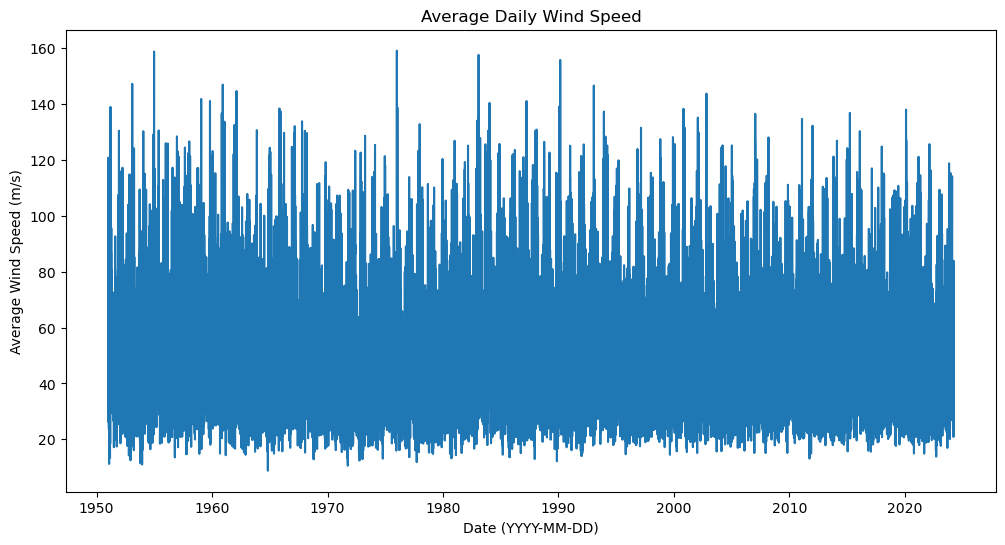

In [23]:
import matplotlib.pyplot as plt

daily_wind_speed = df.groupby(df['Date (YYYY-MM-DD)'].dt.date)['Hourly Average Wind Speed (m/s)'].mean()

# Plot
plt.figure(figsize=(12, 6))
daily_wind_speed.plot(title='Average Daily Wind Speed')
plt.xlabel('Date (YYYY-MM-DD)')
plt.ylabel('Average Wind Speed (m/s)')
plt.show()

### Temperature

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame and has been prepared as previously discussed
df['Date (YYYY-MM-DD)'] = pd.to_datetime(df['Date (YYYY-MM-DD)'])  # Ensure 'Date' is a datetime object
df['Month'] = df['Date (YYYY-MM-DD)'].dt.month  # Extract month for seasonal categorization

# Define months for each season
spring_months = [3, 4, 5]
summer_months = [6, 7, 8]
fall_months = [9, 10, 11]
winter_months = [12, 1, 2]

# Filter data by season
spring_data = df[df['Month'].isin(spring_months)]
summer_data = df[df['Month'].isin(summer_months)]
fall_data = df[df['Month'].isin(fall_months)]
winter_data = df[df['Month'].isin(winter_months)]

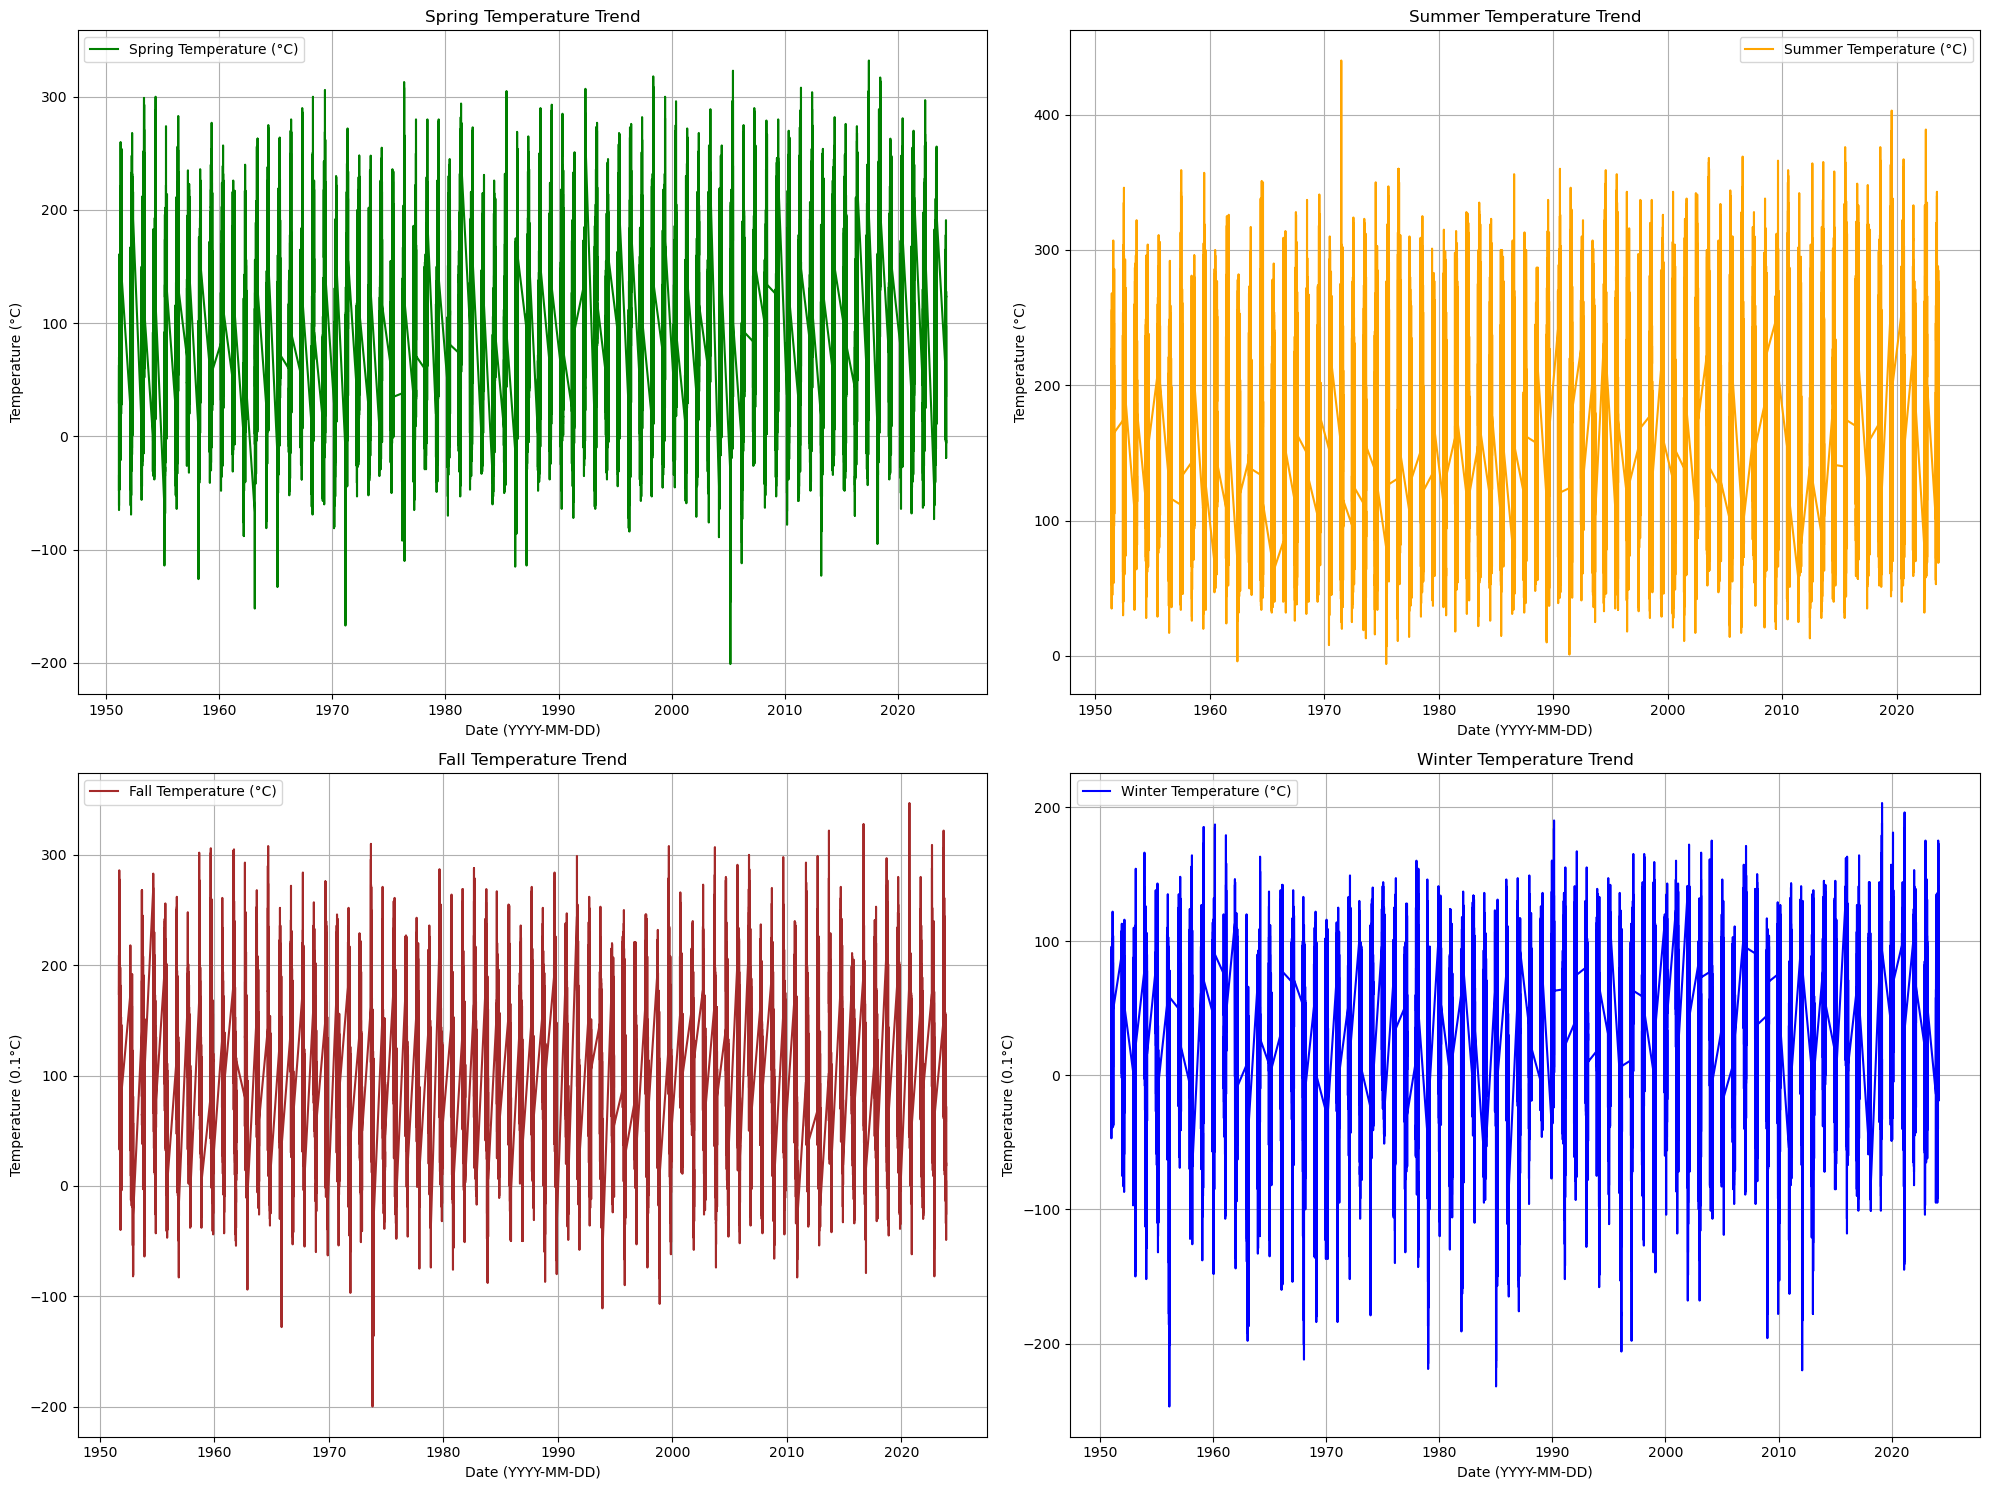

In [25]:
# Setup the plot grid
fig, axs = plt.subplots(2, 2, figsize=(20, 15))  # Adjust size as needed

# Plot Temperature Trend for Spring
axs[0, 0].plot(spring_data['Date (YYYY-MM-DD)'], spring_data['Temperature (0.1°C)'], label='Spring Temperature (°C)', color='green')
axs[0, 0].set_title('Spring Temperature Trend')
axs[0, 0].set_xlabel('Date (YYYY-MM-DD)')
axs[0, 0].set_ylabel('Temperature (°C)')
axs[0, 0].grid(True)
axs[0, 0].legend()

# Plot Temperature Trend for Summer
axs[0, 1].plot(summer_data['Date (YYYY-MM-DD)'], summer_data['Temperature (0.1°C)'], label='Summer Temperature (°C)', color='orange')
axs[0, 1].set_title('Summer Temperature Trend')
axs[0, 1].set_xlabel('Date (YYYY-MM-DD)')
axs[0, 1].set_ylabel('Temperature (°C)')
axs[0, 1].grid(True)
axs[0, 1].legend()

# Plot Temperature Trend for Fall
axs[1, 0].plot(fall_data['Date (YYYY-MM-DD)'], fall_data['Temperature (0.1°C)'], label='Fall Temperature (°C)', color='brown')
axs[1, 0].set_title('Fall Temperature Trend')
axs[1, 0].set_xlabel('Date (YYYY-MM-DD)')
axs[1, 0].set_ylabel('Temperature (0.1°C)')
axs[1, 0].grid(True)
axs[1, 0].legend()

# Plot Temperature Trend for Winter
axs[1, 1].plot(winter_data['Date (YYYY-MM-DD)'], winter_data['Temperature (0.1°C)'], label='Winter Temperature (°C)', color='blue')
axs[1, 1].set_title('Winter Temperature Trend')
axs[1, 1].set_xlabel('Date (YYYY-MM-DD)')
axs[1, 1].set_ylabel('Temperature (0.1°C)')
axs[1, 1].grid(True)
axs[1, 1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


### Stations Herwijnen, Maastricht, Volkel 
Below in the third dataset about different Weather station locations, we conducted that stations Herwijnen, Maastricht, Volkel  are the nearest to the cities our users travels to and from. The following stations have station ids respectivelly - 356, 375, 380 and this is why now we would try to understand more about specificaly them.

In [26]:
df['Station ID'].unique()

array([380, 310, 290, 280, 350, 370, 275, 240, 235, 210, 270, 260, 375,
       265, 344, 330, 225, 308, 331, 285, 312, 316, 348, 273, 356, 279,
       283, 269, 286, 391, 267, 343, 278, 277, 319, 340, 251, 248, 242,
       315, 313, 311, 324, 249, 377, 209, 257, 258, 323, 215])

Clearly here we can not only see the unique values for 'Station ID' but can also conclude that there are hidden characters and/or space that should be removed. 

In [27]:
#df['Station ID'] = df['Station ID'].str.replace(' ', '', regex=False)
#df['Station ID'].unique()

Also, lets check the values for the three nearest stations of the cities that regard our user journey - Herwijnen, Maastricht, Volkel.

In [28]:
station1 = df[df['Station ID'] == '356']
station2 = df[df['Station ID'] == '375']
station3 = df[df['Station ID'] == '380']

In [29]:
station1.value_counts().sum()

0

In [30]:
station2.value_counts().sum()

0

In [31]:
station3.value_counts().sum()

0

These represent the total value of data per each corresponding station or in total:

In [32]:
station_ids = ['356', '375', '380']

filtered_df = df[df['Station ID'].isin(station_ids)]

print(filtered_df.shape)

(0, 16)


In [33]:
for column in df:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print()

Value counts for Date (YYYY-MM-DD):
Date (YYYY-MM-DD)
2014-12-09    1152
2012-08-20    1152
2012-08-09    1152
2012-08-10    1152
2012-08-11    1152
              ... 
1951-01-28     288
1951-01-29     288
1951-01-30     288
1951-01-31     288
1951-01-01     288
Name: count, Length: 26747, dtype: int64

Value counts for Station ID:
Station ID
310    641928
260    641928
290    641928
280    641928
350    641928
370    641928
275    641928
240    641928
235    641928
270    641928
375    641184
380    633174
344    591528
210    572712
265    493872
330    466632
225    466632
308    457872
285    378960
312    370200
316    361440
331    350640
348    332976
273    308832
356    302184
283    301135
279    300608
286    299505
269    299267
391    295721
267    295721
343    291312
278    291312
277    289488
319    287112
340    271608
251    261528
248    260328
242    250416
315    237984
313    237984
324    232152
249    219408
377    216840
209    202944
257    200760
311    1712

In [34]:
na_count_in_columns = df.isnull().sum()

print("Number of NaN values in each column:")
print(na_count_in_columns)

Number of NaN values in each column:
Date (YYYY-MM-DD)                          0
Station ID                                 0
Hour                                       0
Hourly Average Wind Speed (m/s)      2221137
Wind Speed (m/s)                      380534
Highest Wind Gust (m/s)              2969856
Temperature (0.1°C)                        0
Duration of Precipitation (hours)    7516068
Precipitation Amount (mm)            7385292
Visibility (m)                       7268187
Fog Indicator                              0
Rainfall Indicator                         0
Snow Indicator                             0
Thunderstorm Indicator                     0
Ice Formation Indicator                    0
Month                                      0
dtype: int64


In order to analyze each Year and make comparisons, we would make a copy dataframe where the last 4 characters of 'Date (YYYY-MM-DD)'are removed in order to leave with only the year. 

In [35]:
df_sorted = df.copy()

df_sorted['Date (YYYY-MM-DD)'] = df_sorted['Date (YYYY-MM-DD)'].dt.year #removes the last 4 - the month and the date 
df_sorted = df_sorted.sort_values(by='Date (YYYY-MM-DD)', ascending=True)

df_sorted['Date (YYYY-MM-DD)'].value_counts()

Date (YYYY-MM-DD)
2012    421632
2013    420480
2015    420480
2011    420480
2006    419736
         ...  
1955    122640
1954    122640
1953    122640
1951    116064
2024     93840
Name: count, Length: 74, dtype: int64

## Let's continues with:

    Duration of Precipitation (hours)   - DOP
    Precipitation Amount (mm)           - PA
    Visibility (m)                      - V

## Visibility

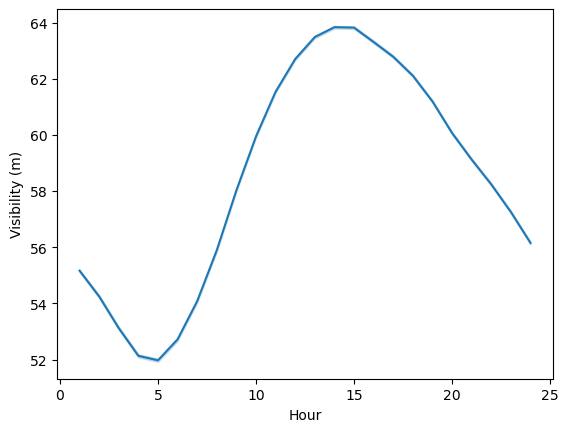

In [36]:
# Line chart for 'Hour' and 'Visibility (m)'
sns.lineplot(data=df, x='Hour', y='Visibility (m)')
plt.show()

In [37]:
# Calculate the mean 'Visibility (m)' for each 'Hour'
mean_visibility = df.groupby('Hour')['Visibility (m)'].mean()
mean_visibility

Hour
1     55.166424
2     54.249194
3     53.120663
4     52.136448
5     51.976425
6     52.723732
7     54.084915
8     55.899371
9     58.029124
10    59.948151
11    61.538379
12    62.701880
13    63.484188
14    63.834761
15    63.819157
16    63.306602
17    62.782292
18    62.107117
19    61.191938
20    60.067545
21    59.122721
22    58.238915
23    57.255968
24    56.156154
Name: Visibility (m), dtype: float64

Let's do it by seasons

In [38]:
def get_season(date):
    if (date.month == 12 and date.day >= 21) or (date.month < 3) or (date.month == 3 and date.day <= 20):
        return 'Winter'
    elif (date.month >= 3 and date.day > 20) or (date.month < 6) or (date.month == 6 and date.day <= 20):
        return 'Spring'
    elif (date.month >= 6 and date.day > 20) or (date.month < 9) or (date.month == 9 and date.day <= 21):
        return 'Summer'
    else:
        return 'Autumn'

df['Season'] = df['Date (YYYY-MM-DD)'].apply(get_season)
df.head()

,Date (YYYY-MM-DD),Station ID,Hour,Hourly Average Wind Speed (m/s),Wind Speed (m/s),Highest Wind Gust (m/s),Temperature (0.1°C),Duration of Precipitation (hours),Precipitation Amount (mm),Visibility (m),Fog Indicator,Rainfall Indicator,Snow Indicator,Thunderstorm Indicator,Ice Formation Indicator,Month,Season
0,1951-01-01,380,23,98.0,0.0,NaN,22.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1,Winter
1,1951-01-01,310,3,87.0,87.0,NaN,14.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1,Winter
2,1951-01-01,310,2,93.0,0.0,NaN,11.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1,Winter
3,1951-01-01,310,1,93.0,0.0,NaN,9.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1,Winter
4,1951-01-01,290,24,NaN,62.0,NaN,21.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1,Winter


C:\Users\zashe\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


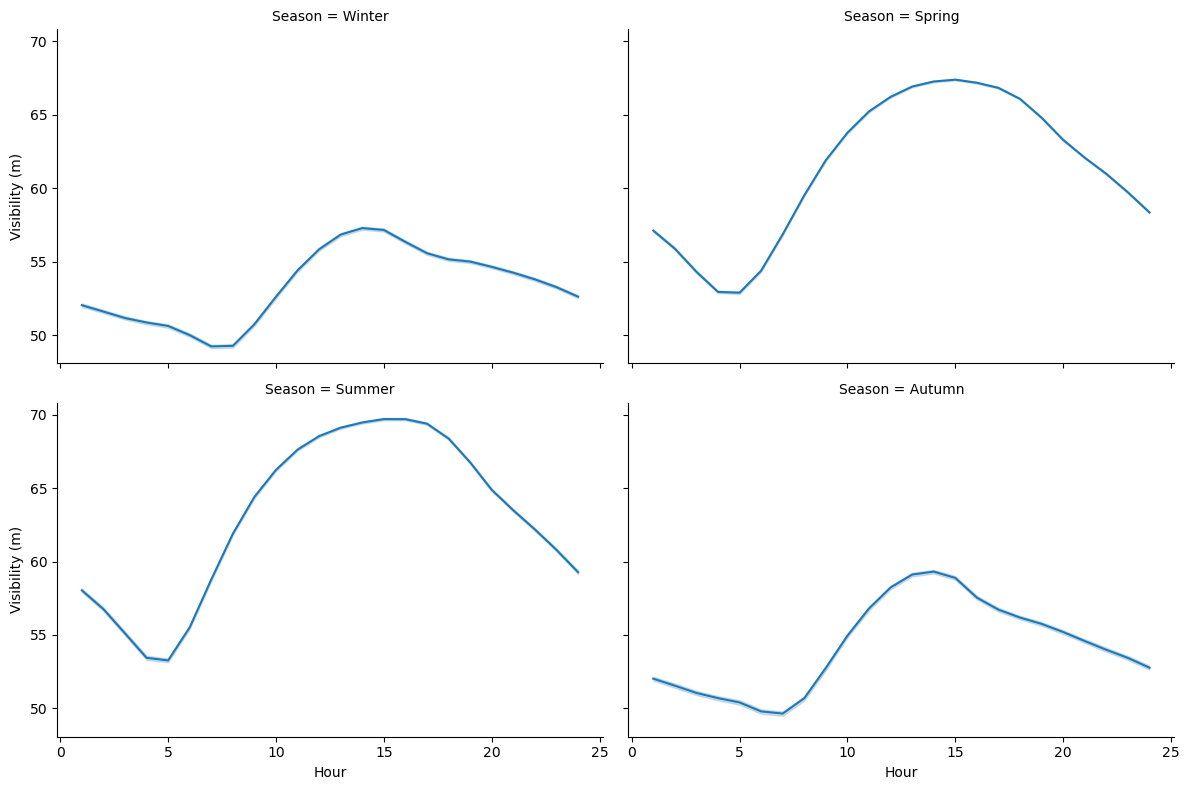

In [39]:
# Create a FacetGrid
g = sns.FacetGrid(df, col='Season', col_wrap=2, height=4, aspect=1.5)

# Map to line plots
g.map(sns.lineplot, 'Hour', 'Visibility (m)')

plt.show()

In [40]:
# Calculate the mean 'Visibility (m)' for each 'Hour' of each 'Season'
mean_visibility = df.groupby(['Season','Hour'])['Visibility (m)'].mean()
mean_visibility.head(32)

Season  Hour
Autumn  1       52.024931
        2       51.547880
        3       51.051601
        4       50.698214
        5       50.404950
        6       49.793119
        7       49.646079
        8       50.692000
        9       52.756264
        10      54.952401
        11      56.806323
        12      58.235937
        13      59.114862
        14      59.315953
        15      58.886908
        16      57.544206
        17      56.725585
        18      56.186505
        19      55.755494
        20      55.201124
        21      54.586565
        22      53.990515
        23      53.439274
        24      52.772276
Spring  1       57.121085
        2       55.889735
        3       54.311324
        4       52.941793
        5       52.888268
        6       54.388482
        7       56.863045
        8       59.522946
Name: Visibility (m), dtype: float64

In [1]:
def fill_visibility(row):
    if pd.isna(row['Visibility (m)']):
        return mean_visibility[row['Season'], row['Hour']]
    else:
        return row['Visibility (m)']

df['Visibility (m)'] = df.apply(fill_visibility, axis=1)

df

NameError: name 'df' is not defined

In [ ]:
df.shape
df.isna().sum()

Final check to see if the Values have not changed drasticly

In [ ]:
# Create a FacetGrid
g = sns.FacetGrid(df, col='Season', col_wrap=2, height=4, aspect=1.5)

# Map to line plots
g.map(sns.lineplot, 'Hour', 'Visibility (m)')

plt.show()

### Let's continue on with the Precipitation amount and Duration of Precipitation 

In [ ]:
#Scatterplot for 'Duration of Precipitation (hours)' and 'Precipitation Amount (mm)'
sns.scatterplot(data=df, x='Duration of Precipitation (hours)', y='Precipitation Amount (mm)')
plt.show()

There do seem to be some outliers


In [ ]:
value_counts = df['Duration of Precipitation (hours)'].value_counts()
print(value_counts)

In [ ]:
sns.stripplot(data=df, x='Duration of Precipitation (hours)', y='Precipitation Amount (mm)', jitter=True, alpha=0.1)
plt.show()

There do seem to be outliners, however it is not that big of a problem with the way that we are going to address them

In [ ]:
# Filter the DataFrame
df_filtered = df[~df['Duration of Precipitation (hours)'].isin([14, 15, 39])]

# Scatterplot for 'Duration of Precipitation (hours)' and 'Precipitation Amount (mm)'
sns.scatterplot(data=df_filtered, x='Duration of Precipitation (hours)', y='Precipitation Amount (mm)')
plt.show()

based on the scatterplot we do see that it is possible to separete them based on the DOP

Let's check the values by stations like previously done

In [ ]:
df.groupby('Station ID').apply(lambda x: x.isna().sum())


as expected, the most are in 375, however let us see what it also looks like hourly for everything, sinve there are quite a lot fo missing values (current)


In [ ]:
df.groupby('Hour').apply(lambda x: x.isna().sum())

Let's start grouping by the duration of precipitation that seems reasonable

In [ ]:
def categorize_dop(duration_of_precipitation):
    if pd.isna(duration_of_precipitation):
        return 0
    elif duration_of_precipitation <= 2:
        return 1
    elif duration_of_precipitation <= 9:
        return 2
    else:
        return 3

df['DOP Sector'] = df['Duration of Precipitation (hours)'].apply(categorize_dop)

df['DOP Sector'].unique()

Let's fill in the missing values based on the categories that we gave them 

In [ ]:
df['Precipitation Amount (mm)'] = df.groupby('DOP Sector')['Precipitation Amount (mm)'].transform(lambda x: x.fillna(x.mean()))

df['Precipitation Amount (mm)'].fillna(df['Precipitation Amount (mm)'].mean(), inplace=True)

df

In [ ]:
#Scatterplot for 'Duration of Precipitation (hours)' and 'Precipitation Amount (mm)'
sns.scatterplot(data=df, x='Duration of Precipitation (hours)', y='Precipitation Amount (mm)')
plt.show()

In [ ]:
# Create a FacetGrid
g = sns.FacetGrid(df, col='Duration of Precipitation (hours)', col_wrap=3, height=4, aspect=1.5)

# Map to KDE plots
g.map(sns.kdeplot, 'Precipitation Amount (mm)')

plt.show()

### Duration of precipitation:


By the wat we previously did the PA, it would seem a good idea to do the DOP the same way, since it also does seem like it correlates mainly with the PA

In [ ]:
df.groupby('Station ID').apply(lambda x: x.isna().sum())

In [ ]:
df.groupby('Hour').apply(lambda x: x.isna().sum())

In [ ]:
mean_precipitation = df.groupby('Duration of Precipitation (hours)')['Precipitation Amount (mm)'].mean()
mean_precipitation

Now with the help of a function we can fill in the places where the DOP values are empty, but the PA values are filled in, with a mean

In [ ]:
# Function to find the 'Duration of Precipitation (hours)' value with the closest mean 'Precipitation Amount (mm)'
def find_closest_duration(row):
    return (mean_precipitation - row['Precipitation Amount (mm)']).abs().idxmin()

# Apply the function to the rows where 'Duration of Precipitation (hours)' is missing
df.loc[df['Duration of Precipitation (hours)'].isna(), 'Duration of Precipitation (hours)'] = df[df['Duration of Precipitation (hours)'].isna()].apply(find_closest_duration, axis=1)

Now let's see what the changes look like 

In [ ]:
df.sample(15)

In [ ]:
#Scatterplot for 'Duration of Precipitation (hours)' and 'Precipitation Amount (mm)'
sns.scatterplot(data=df, x='Duration of Precipitation (hours)', y='Precipitation Amount (mm)')
plt.show()

In [ ]:
df.isna().sum()

Hours, DOP, PA, Hours - Scatterplot

In [ ]:
df.sample(15)

# Cleaning the wind-related columns

In [ ]:
df_numerical_columns = df.select_dtypes(include=['int64', 'float64', 'int32'])

alex_correlation_matrix = df_numerical_columns.corr()

plt.figure(figsize=(14, 14))
sns.heatmap(alex_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numerical Columns)')
plt.show()

In [ ]:
df.isna().sum()

All 3 wind-related columns correlate the most with the 'Visibility (m)' column. The correlation aren't strong (between 0.21-0.25) but they are the best we've got. We should keep in mind that computing the correlation coefficients only works when conparing 2 continuous variables. We will have to look into the discrete and binary ones separately (at least the logical ones). We will skip the ones that have NAs in them, because they won't fully resolve the issue of removing the NAs in our 3 columns.

First, we will clean the Hourly Average Wind Speed column.

In [ ]:
plt.scatter(df['Visibility (m)'], df['Hourly Average Wind Speed (m/s)'], alpha=0.1)
plt.title('Scatter Plot of Visibility vs Hourly Average Wind Speed')
plt.xlabel('Visibility (m)')
plt.ylabel('Hourly Average Wind Speed (m/s)')

We can see that visibility does impact the hourly average wind speed, but it only affects the upper limit of the range. A large percent of the hourly average wind speed values can be seen across the whole visibility range. Therefore, it would be difficult to clean this column based on the visibility.

In [ ]:
filtered_df = df[df['Station ID'].isin([356, 375, 380])]   # If we decide to include more stations in the modeling, they can just be added here.

mean_hr_avg_wind_speed = filtered_df.groupby('Station ID')['Hourly Average Wind Speed (m/s)'].mean()
mean_hr_avg_wind_speed

We can see that the mean of the hourly average wind speed is different for the different stations. Geographically, it makes sense that some places will experience more/stronger wind than others. Still, the stations are relatively close to each other and the differences are small.

In [ ]:
df.groupby('Hour')['Hourly Average Wind Speed (m/s)'].mean()

We can also see that the hour of the day has an impact on the mean of the hourly average wind speed.

In [ ]:
df.groupby('Fog Indicator')['Hourly Average Wind Speed (m/s)'].mean()

Whether fog is present or not has a BIG impact on the hourly average wind speed which makes sense as stronger winds would disperse the fog.

In [ ]:
df.groupby('Rainfall Indicator')['Hourly Average Wind Speed (m/s)'].mean()

In [ ]:
df.groupby('Snow Indicator')['Hourly Average Wind Speed (m/s)'].mean()

In [ ]:
df.groupby('Thunderstorm Indicator')['Hourly Average Wind Speed (m/s)'].mean()

The rainfall, snow and thunderstorm indicators have a much smaller impact on the hourly average wind speed.

In [ ]:
df.groupby('Ice Formation Indicator')['Hourly Average Wind Speed (m/s)'].mean()

The ice formation indicator also plays a big role in whether the average wind speed will be high or not.

In [ ]:
df.groupby('Month')['Hourly Average Wind Speed (m/s)'].mean()

The mean of the hourly average wind speed is different for the different months. Instead of the ice formation indicator, we can use the month, since whether there are conditions for ice or not depends a lot on the month.

Based on everything above, we can clean the hourly average wind speed column by grouping the data by month, hour and fog indicator and filling in the missing values with the mean. For instance, a value that is missing in January, at 12 pm, with no fog present, will be filled with the mean of all non-missing values in January at 12 pm, with no fog present.

In [ ]:
# Group by 'Month', 'Hour', and 'Hourly Average Wind Speed (m/s)' and calculate mean wind speed for each group
grouped_means = df.groupby(['Month', 'Hour', 'Fog Indicator'])['Hourly Average Wind Speed (m/s)'].mean().reset_index()

# Merge the calculated means back to the original dataframe
df_filled = pd.merge(df, grouped_means, on=['Month', 'Hour', 'Fog Indicator'], suffixes=('', '_mean'))

# Fill missing values in 'Hourly Average Wind Speed (m/s)' column with corresponding group means
df_filled['Hourly Average Wind Speed (m/s)'] = df_filled['Hourly Average Wind Speed (m/s)'].fillna(df_filled['Hourly Average Wind Speed (m/s)_mean'])

# Replacing the column in the initial dataset
df['Hourly Average Wind Speed (m/s)'] = df_filled['Hourly Average Wind Speed (m/s)']

In [ ]:
df.isna().sum()

This column was cleaned successfully. Continuing with the Wind Speed (m/s) column:

In [ ]:
plt.scatter(df['Visibility (m)'], df['Wind Speed (m/s)'], alpha=0.1)
plt.title('Scatter Plot of Visibility vs Wind Speed')
plt.xlabel('Visibility (m)')
plt.ylabel('Wind Speed (m/s)')

The case here is the same as in the previous column. We can see that visibility does impact the wind speed, but it only affects the upper limit of the range. A large percent of the wind speed values can be seen across the whole visibility range. Therefore, it would be difficult to clean this column based on the visibility.

In [ ]:
mean_wind_speed = filtered_df.groupby('Station ID')['Wind Speed (m/s)'].mean()
mean_wind_speed

We can see that the mean of the wind speed is different for the different stations too. The values are almost identical to the ones of the hourly average wind speed.

In [ ]:
df.groupby('Hour')['Wind Speed (m/s)'].mean()

We can also see that the hour of the day has an impact on the mean of the wind speed as well.

In [ ]:
df.groupby('Fog Indicator')['Wind Speed (m/s)'].mean()

Whether fog is present or not has a BIG impact on the wind speed too.

In [ ]:
df.groupby('Rainfall Indicator')['Wind Speed (m/s)'].mean()

In [ ]:
df.groupby('Snow Indicator')['Wind Speed (m/s)'].mean()

In [ ]:
df.groupby('Thunderstorm Indicator')['Wind Speed (m/s)'].mean()

The rainfall, snow and thunderstorm indicators have a much smaller impact on the wind speed - same as in the previous column.

In [ ]:
df.groupby('Ice Formation Indicator')['Wind Speed (m/s)'].mean()

Again, the ice formation indicator plays a big role in whether the wind speed will be high or not.

In [ ]:
df.groupby('Month')['Wind Speed (m/s)'].mean()

The mean of the wind speed is different for the different months - the same as the previous column. In general, all the values for this column are very close to the values of the previous one. Instead of the ice formation indicator, we can use the month, since whether there are conditions for ice or not depends a lot on the month.

Based on everything above, we can clean the wind speed column in the same way we cleaned the hourly average wind speed column.

In [ ]:
# Group by 'Month', 'Hour', and 'Hourly Average Wind Speed (m/s)' and calculate mean wind speed for each group
grouped_means_2 = df.groupby(['Month', 'Hour', 'Fog Indicator'])['Wind Speed (m/s)'].mean().reset_index()

# Merge the calculated means back to the original dataframe
df_filled_2 = pd.merge(df, grouped_means_2, on=['Month', 'Hour', 'Fog Indicator'], suffixes=('', '_mean'))

# Fill missing values in 'Hourly Average Wind Speed (m/s)' column with corresponding group means
df_filled_2['Wind Speed (m/s)'] = df_filled_2['Wind Speed (m/s)'].fillna(df_filled_2['Wind Speed (m/s)_mean'])

# Replacing the column in the initial dataset
df['Wind Speed (m/s)'] = df_filled_2['Wind Speed (m/s)']

In [ ]:
df.isna().sum()

Wind Speed has been successfully cleaned too. Continuing with the Highest Wind Gust (m/s) column:

In [ ]:
plt.scatter(df['Visibility (m)'], df['Highest Wind Gust (m/s) '], alpha=0.1)
plt.title('Scatter Plot of Visibility vs Highest Wind Gust')
plt.xlabel('Visibility (m)')
plt.ylabel('Highest Wind Gust (m/s)')

The case here is the same as in the previous 2 columns. We can see that visibility does impact the highest wind gust, but it only affects the upper limit of the range. A large percent of the wind gust values can be seen across the whole visibility range. Therefore, it would be difficult to clean this column based on the visibility.

In [ ]:
mean_highest_wind_gust = filtered_df.groupby('Station ID')['Highest Wind Gust (m/s) '].mean()
mean_highest_wind_gust

We can see that the mean of the highest wind gust is different for the different stations too. The values of station 356 and 380 are very close. Overall, all 3 values are close to one another, so, again, stations don't make a big difference.

In [ ]:
df.groupby('Hour')['Highest Wind Gust (m/s) '].mean()

We can also see that the hour of the day has an impact on the mean of the highest wind gust as well.

In [ ]:
df.groupby('Fog Indicator')['Highest Wind Gust (m/s) '].mean()

Whether fog is present or not has a BIG impact on the highest wind gust too.

In [ ]:
df.groupby('Rainfall Indicator')['Highest Wind Gust (m/s) '].mean()

In [ ]:
df.groupby('Snow Indicator')['Highest Wind Gust (m/s) '].mean()

In [ ]:
df.groupby('Thunderstorm Indicator')['Highest Wind Gust (m/s) '].mean()

The rainfall, snow and thunderstorm indicators have a much smaller impact on the highest wind gust - same as in the previous columns.

In [ ]:
df.groupby('Ice Formation Indicator')['Highest Wind Gust (m/s) '].mean()

Again, the ice formation indicator plays a big role in whether the highest wind gust will be high or not.

In [ ]:
df.groupby('Month')['Highest Wind Gust (m/s) '].mean()

The mean of the highest wind gust is different for the different months - the same as the previous columns. Instead of the ice formation indicator, we can use the month, since whether there are conditions for ice or not depends a lot on the month.

Based on everything above, we can clean the highest wind gust column in the same way we cleaned the previous two.

In [ ]:
# Group by 'Month', 'Hour', and 'Hourly Average Wind Speed (m/s)' and calculate mean wind speed for each group
grouped_means_3 = df.groupby(['Month', 'Hour', 'Fog Indicator'])['Highest Wind Gust (m/s) '].mean().reset_index()

# Merge the calculated means back to the original dataframe
df_filled_3 = pd.merge(df, grouped_means_3, on=['Month', 'Hour', 'Fog Indicator'], suffixes=('', '_mean'))

# Fill missing values in 'Hourly Average Wind Speed (m/s)' column with corresponding group means
df_filled_3['Highest Wind Gust (m/s) '] = df_filled_3['Highest Wind Gust (m/s) '].fillna(df_filled_3['Highest Wind Gust (m/s) _mean'])

# Replacing the column in the initial dataset
df['Highest Wind Gust (m/s) '] = df_filled_3['Highest Wind Gust (m/s) ']

In [ ]:
df.isna().sum()

All 3 wind-related columns have been cleaned.

#### Distribution of the data per each year

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt  

plt.figure(figsize=(12, 6))
sns.countplot(data=df_sorted, x='Date (YYYY-MM-DD)')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of data per year', fontsize=10)

plt.yscale('log')
plt.xticks(rotation=45, ha='right', fontsize=5) 
plt.show()

This plots represents the number of data for each year from 1951 until 2024. However, still 2024 is not over and this is why we lack of data there. 

In [ ]:
df_sorted = df_sorted[df_sorted['Date (YYYY-MM-DD)'] >= 2015]

print(df_sorted)

In [ ]:
df_sorted.shape

In [ ]:
df.to_csv("datasets/CleanWeather.csv", index=False)